# This AI model will be trained and tested against MNIST data set and will be
# able to classify handwritten digits.

In [1]:
import tensorflow as tf # framework for building the model

## Loading MNIST dataset - handwritten digits (0-9) with 28x28 size
## Tensorflow has it already and can be loaded using Keras.

In [2]:
mnist = tf.keras.datasets.mnist

# Unpacking and dividing the dataset into training and testing datasets
(xTrain, yTrain), (xTest, yTest) = mnist.load_data()

In [3]:
# MNIST data contains 60000 training samples and 10000 testing samples
print(len(xTrain))
print(len(yTrain))
print(len(xTest))
print(len(yTest))

# Shape of the image is 28x28
print(xTrain[0].shape)
print(xTrain[0])

60000
60000
10000
10000
(28, 28)
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  

## Importing matplotlib to plot and view the images

In [4]:
import matplotlib.pyplot as plt

### Visualising one sample image

5


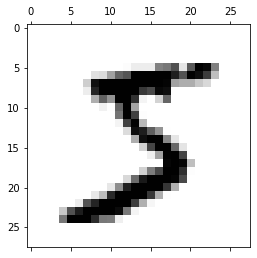

In [5]:
plt.matshow(xTrain[0])
print(yTrain[0])

# we don't know if it's coloured image or binary image
# so, we shall change the configuration to simple binary
plt.imshow(xTrain[0], cmap=plt.cm.binary)

## To bring all the values in the data to the same range, we need to normalise/scale the images

## We converted the images to gray scale and the values of the pixels range from 0 to 255. (0 --> Black, 255 --> White)

## So inorder to scale it, we shall make the values ranging from 0 to 1 which can be done by dividing by 255

In [6]:
xTrain = xTrain / 255
xTest = xTest / 255

print(xTrain[0])
print(xTest[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

## Resizing image to make it suitable for applying Convolution operations

In [7]:
import numpy as np # required for array and other mathematical operations

In [8]:
IMG_SIZE = 28
# increasing by one dimension (making it 4-dimensional) so that it can work with
# Keras API
xTrainr = np.array(xTrain).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
xTestr = np.array(xTest).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

print("Training samples:", xTrainr.shape)
print("Testing samples:", xTestr.shape)

Training samples: (60000, 28, 28, 1)
Testing samples: (10000, 28, 28, 1)


## Creating the Deep Neural Netwrok and training on 60000 samples

In [9]:
# Importing the required functions
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, MaxPooling2D
from tensorflow.keras.layers import Flatten, Conv2D

In [10]:
# Creating a simple neural network
model = Sequential() # Sequential allows to build a model layer by layer

# First Convolutional Layer (from 28^2 to 26^2)
# (input layer size is mentioned for only first layer)
model.add(Conv2D(64, (3, 3), input_shape = xTrainr.shape[1: ]))
# activation function to make it non-linear
model.add(Activation("relu"))
# maxpooling single maximum value of 2x2
model.add(MaxPooling2D(pool_size=(2, 2))) # selects the maximum element from
                                          # each region of the feature map
                                          # reducing the size by half

# Second Convolutional Layer (from 26^2 to 24^2)
model.add(Conv2D(64, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Third Convolutional Layer (from 24^2 to 22^2)
model.add(Conv2D(64, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Now we shall flatten (transfroming into a single column) the feature map
# matrix before connecting the layers fully
model.add(Flatten())

# Creating the dense layer (fully connecting the each layer to the next layer)
model.add(Dense(64)) # connecting first layer
model.add(Activation("relu"))

model.add(Dense(32)) # connecting layer 2
model.add(Activation("relu"))

# Last fully connected layer, where the output must be equal to number of
# classes, 10, that is (0 to 9)
model.add(Dense(10))
model.add(Activation("softmax")) # class probabilities

# Displaying the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 activation (Activation)     (None, 26, 26, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 activation_1 (Activation)   (None, 11, 11, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                    

## Compiling our AI model

In [11]:
model.compile(
    optimizer="adam", # controls the learning rate
    loss="sparse_categorical_crossentropy", # estimates the loss of the model
    metrics=['accuracy']
)

## Training the model with the training dataset

In [12]:
model.fit(xTrainr, yTrain, epochs=10, validation_split=0.3)

Epoch 1/10
1313/1313 [==============================] - 46s 34ms/step - loss: 0.2809 - accuracy: 0.9110 - val_loss: 0.1047 - val_accuracy: 0.9677
Epoch 2/10
1313/1313 [==============================] - 46s 35ms/step - loss: 0.0838 - accuracy: 0.9744 - val_loss: 0.0846 - val_accuracy: 0.9740
Epoch 3/10
1313/1313 [==============================] - 46s 35ms/step - loss: 0.0627 - accuracy: 0.9803 - val_loss: 0.0691 - val_accuracy: 0.9799
Epoch 4/10
1313/1313 [==============================] - 47s 35ms/step - loss: 0.0493 - accuracy: 0.9852 - val_loss: 0.0527 - val_accuracy: 0.9847
Epoch 5/10
1313/1313 [==============================] - 46s 35ms/step - loss: 0.0398 - accuracy: 0.9871 - val_loss: 0.0566 - val_accuracy: 0.9834
Epoch 6/10
1313/1313 [==============================] - 47s 36ms/step - loss: 0.0324 - accuracy: 0.9894 - val_loss: 0.0607 - val_accuracy: 0.9829
Epoch 7/10
1313/1313 [==============================] - 46s 35ms/step - loss: 0.0282 - accuracy: 0.9908 - val_loss: 0.0614 -

## Evaluation of the model on the basis of the test data set

In [13]:
model.evaluate(xTest, yTest)

313/313 [==============================] - 3s 9ms/step - loss: 0.0551 - accuracy: 0.9854


[0.055073536932468414, 0.9854000210762024]

## The model making predictions

In [14]:
yPredicted = model.predict([xTestr]) # the prediction array of all the samples
print(yPredicted)

[[8.1247897e-11 8.1415442e-07 4.5512181e-07 ... 9.9999857e-01
  1.0625442e-10 1.8571688e-08]
 [3.0087338e-10 3.8562450e-10 1.0000000e+00 ... 2.9096283e-08
  1.3382246e-11 1.1561924e-11]
 [5.1465618e-06 9.9977070e-01 6.2893545e-05 ... 2.7079501e-05
  3.9008057e-05 5.9724111e-06]
 ...
 [2.9824220e-14 5.5265342e-14 5.2473462e-15 ... 9.0461879e-14
  3.1217154e-10 3.9833740e-12]
 [7.4126933e-07 1.4875223e-09 3.1524905e-10 ... 5.9048630e-12
  1.4734352e-08 3.0052360e-07]
 [1.1843893e-05 3.4163605e-08 6.7896322e-06 ... 4.6956949e-10
  1.7862650e-08 3.8204780e-05]]


[9.9999869e-01 6.5175838e-13 4.7764523e-08 6.8253958e-09 1.4223889e-07
 2.1251678e-09 1.2034546e-08 1.2466992e-08 1.2595599e-09 1.1241956e-06]
0
Correct Prediction!


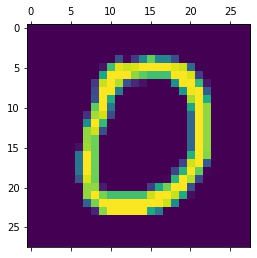

In [15]:
# Checking if the predictions are true
i = 10
plt.matshow(xTestr[i]) # the original test sample
print(yPredicted[i]) # the model's prediction array for that sample
print(np.argmax(yPredicted[i])) # returning the maximum value's index

if np.argmax(yPredicted[i]) == yTest[i]:
    print("Correct Prediction!")
else:
    print("Incorrect Prediction!!!")

## Creating a confusion matrix for this model

In [16]:
yPredictedLabels = [np.argmax(i) for i in yPredicted]
print(yPredictedLabels[: 6])
print(yTest[: 6])

[7, 2, 1, 0, 4, 1]
[7 2 1 0 4 1]


In [17]:
confMatx = tf.math.confusion_matrix(labels=yTest, predictions=yPredictedLabels)
print(confMatx)

tf.Tensor(
[[ 963    1    3    0    2    0    0    4    1    6]
 [   0 1118    2    2    1    3    3    2    3    1]
 [   1    0 1016    3    0    0    0   12    0    0]
 [   0    0    3 1004    0    2    0    1    0    0]
 [   0    0    2    0  976    0    0    1    1    2]
 [   1    1    1   10    0  873    2    1    2    1]
 [   4    1    1    0    5    2  942    0    3    0]
 [   0    2    6    4    1    1    0 1010    2    2]
 [   1    0    4    1    3    0    0    0  961    4]
 [   0    0    3    2    8    1    0    3    1  991]], shape=(10, 10), dtype=int32)


## Visualising the confusion matrix using seaborn library

Text(69.0, 0.5, 'True Value')

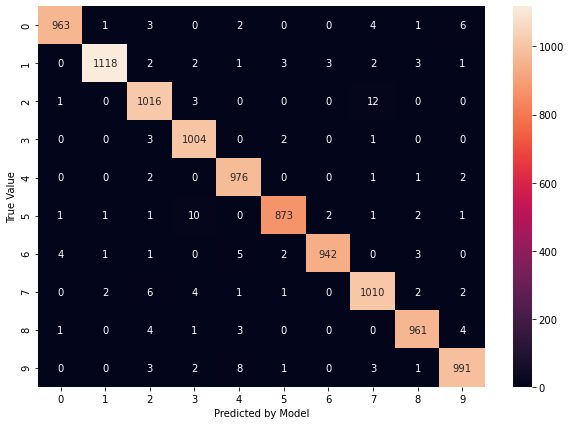

In [18]:
import seaborn as sn
plt.figure(figsize = (10, 7))
sn.heatmap(confMatx, annot=True, fmt='d')
plt.xlabel("Predicted by Model")
plt.ylabel("True Value")

# ----------------------------------------------------------------------------------------------------------